In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output


columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']

train = pd.read_csv('../input/adult-training.csv', names=columns)
test = pd.read_csv('../input/adult-test.csv', names=columns, skiprows=1)

%matplotlib inline

['adult-test.csv', 'adult-training.csv']


In [2]:
train.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlgwt            32561 non-null int64
Education         32561 non-null object
Education num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Native country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
Age               16281 non-null int64
Workclass         16281 non-null object
fnlgwt            16281 non-null int64
Education         16281 non-null object
Education num     16281 non-null int64
Marital Status    16281 non-null object
Occupation        16281 non-null object
Relationship      16281 non-null object
Race              16281 non-null object
Sex               16281 non-null object
Capital Gain      16281 non-null int64
Capital Loss      16281 non-null int64
Hours/Week        16281 non-null int64
Native country    16281 non-null object
Income            16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [5]:
test.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
train.replace(' ?', np.nan, inplace=True)
test.replace(' ?', np.nan, inplace=True)

In [7]:
train.isnull().sum()

Age                  0
Workclass         1836
fnlgwt               0
Education            0
Education num        0
Marital Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours/Week           0
Native country     583
Income               0
dtype: int64

In [8]:
test.isnull().sum()

Age                 0
Workclass         963
fnlgwt              0
Education           0
Education num       0
Marital Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours/Week          0
Native country    274
Income              0
dtype: int64

In [9]:
train['Income'] = train['Income'].apply(lambda x: 1 if x==' >50K' else 0)
test['Income'] = test['Income'].apply(lambda x: 1 if x==' >50K.' else 0)

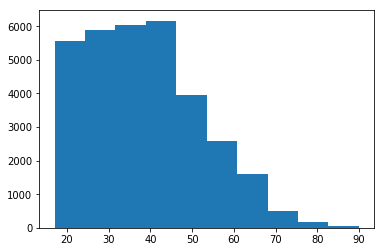

In [10]:
plt.hist(train['Age']);

In [11]:
train['Workclass'].fillna(' 0', inplace=True)
test['Workclass'].fillna(' 0', inplace=True)

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


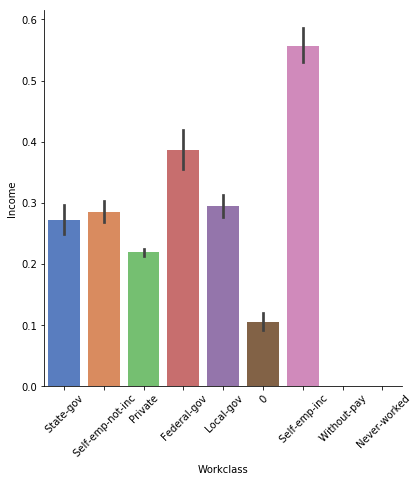

In [12]:
sns.factorplot(x="Workclass", y="Income", data=train, kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);

In [13]:
train['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 0                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [14]:
train['Workclass'].replace(' Without-pay', ' Never-worked', inplace=True)
test['Workclass'].replace(' Without-pay', ' Never-worked', inplace=True)

In [15]:
train['fnlgwt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlgwt, dtype: float64

In [16]:
train['fnlgwt'] = train['fnlgwt'].apply(lambda x: np.log1p(x))
test['fnlgwt'] = test['fnlgwt'].apply(lambda x: np.log1p(x))

In [17]:
train['fnlgwt'].describe()

count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlgwt, dtype: float64

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


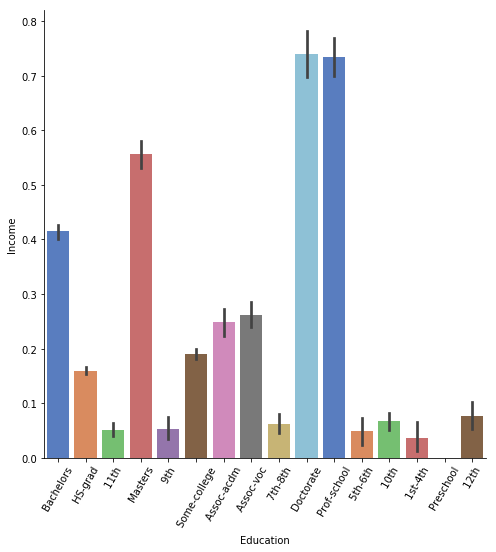

In [18]:
sns.factorplot(x="Education",y="Income",data=train,kind="bar", size = 7, 
palette = "muted")
plt.xticks(rotation=60);

In [19]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return ' Primary'
    else:
        return x

In [20]:
train['Education'] = train['Education'].apply(primary)
test['Education'] = test['Education'].apply(primary)

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


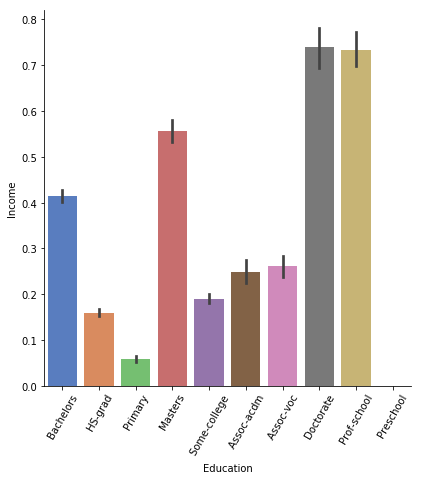

In [21]:
sns.factorplot(x="Education",y="Income",data=train,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


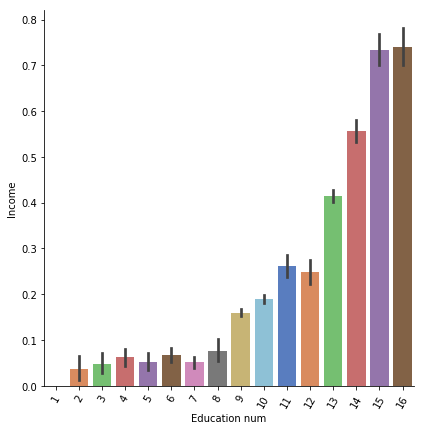

In [22]:
sns.factorplot(x="Education num",y="Income",data=train,kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=60);

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


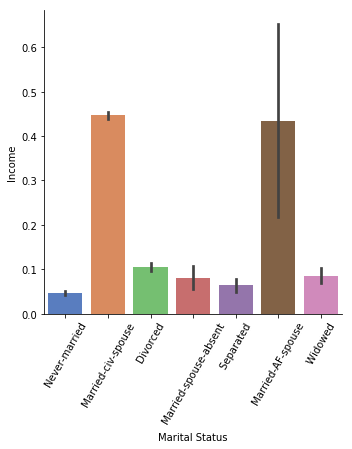

In [23]:
sns.factorplot(x="Marital Status",y="Income",data=train,kind="bar", size = 5, 
palette = "muted")
plt.xticks(rotation=60);

In [24]:
train['Marital Status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital Status, dtype: int64

In [25]:
train['Marital Status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)
test['Marital Status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)

In [26]:
train['Occupation'].fillna(' 0', inplace=True)
test['Occupation'].fillna(' 0', inplace=True)

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


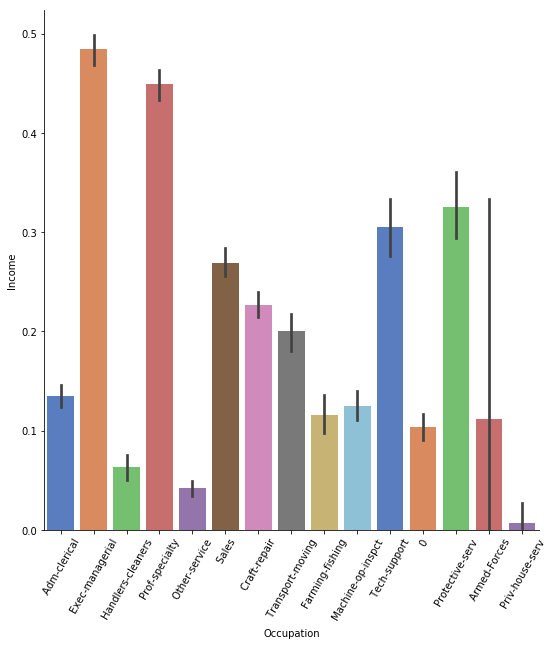

In [27]:
sns.factorplot(x="Occupation",y="Income",data=train,kind="bar", size = 8, 
palette = "muted")
plt.xticks(rotation=60);

In [28]:
train['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 0                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [29]:
train['Occupation'].replace(' Armed-Forces', ' 0', inplace=True)
test['Occupation'].replace(' Armed-Forces', ' 0', inplace=True)

In [30]:
train['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [31]:
train['Race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [32]:
train['Native country'].fillna(' 0', inplace=True)
test['Native country'].fillna(' 0', inplace=True)

In [33]:
def native(country):
    if country in [' United-States', ' Cuba', ' 0']:
        return 'US'
    elif country in [' England', ' Germany', ' Canada', ' Italy', ' France', ' Greece', ' Philippines']:
        return 'Western'
    elif country in [' Mexico', ' Puerto-Rico', ' Honduras', ' Jamaica', ' Columbia', ' Laos', ' Portugal', ' Haiti',
                     ' Dominican-Republic', ' El-Salvador', ' Guatemala', ' Peru', 
                     ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Vietnam', ' Holand-Netherlands' ]:
        return 'Poor' # no offence
    elif country in [' India', ' Iran', ' Cambodia', ' Taiwan', ' Japan', ' Yugoslavia', ' China', ' Hong']:
        return 'Eastern'
    elif country in [' South', ' Poland', ' Ireland', ' Hungary', ' Scotland', ' Thailand', ' Ecuador']:
        return 'Poland team'
    
    else: 
        return country    


In [34]:
train['Native country'] = train['Native country'].apply(native)
test['Native country'] = test['Native country'].apply(native)


In [35]:
train['Native country'].value_counts()

US             29848
Poor            1415
Western          677
Eastern          386
Poland team      235
Name: Native country, dtype: int64

In [36]:
joint = pd.concat([train, test], axis = 0)

In [37]:
joint.dtypes

Age                 int64
Workclass          object
fnlgwt            float64
Education          object
Education num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Native country     object
Income              int64
dtype: object

In [38]:
categorical_features = joint.select_dtypes(include=['object']).axes[1]

for col in categorical_features:
    print (col, joint[col].nunique())

Workclass 8
Education 10
Marital Status 6
Occupation 14
Relationship 6
Race 5
Sex 2
Native country 5


In [39]:
#one-hot encode
for col in categorical_features:
    joint = pd.concat([joint, pd.get_dummies(joint[col], prefix=col, prefix_sep=':')], axis=1)
    joint.drop(col, axis=1, inplace=True)

In [40]:
train = joint.head(train.shape[0])
test = joint.tail(test.shape[0])

In [41]:
Xtrain = train.drop('Income', axis=1)
ytrain = train['Income']

Xtest = test.drop('Income', axis=1)
ytest = test['Income']

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [43]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)

Ytrain = model.predict(Xtrain)
Ytest = model.predict(Xtest)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
print(classification_report(ytrain, Ytrain))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     24720
           1       0.74      0.60      0.66      7841

   micro avg       0.85      0.85      0.85     32561
   macro avg       0.81      0.77      0.78     32561
weighted avg       0.85      0.85      0.85     32561



In [45]:
print(classification_report(ytest, Ytest))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.60      0.66      3846

   micro avg       0.85      0.85      0.85     16281
   macro avg       0.81      0.77      0.78     16281
weighted avg       0.85      0.85      0.85     16281



In [46]:
# now by  by scracth

def sigmoid(z):
  
  return 1 / (1 + np.exp(-z))


def predict(features, weights):
 
  return sigmoid( np.dot(features, weights) )


In [47]:
def cost_function_for_all_training_samples(features, labels, weights):
  m = features.shape[0]  # m = number of samples
  predictions = predict(features, weights)
  return -(1/m) * np.sum( labels*np.log(predictions) + (1-labels)*np.log(1-predictions) )

In [48]:
def decision_boundary(probability, threshold=0.5):
  return 1 if probability >= threshold else 0

In [49]:
def calculate_gradient(features, labels, weights):
    predictions = predict(features, weights)
    matrixOfAggregateSlopeOfCostFunction = np.dot(features.T, predictions - labels)
    return matrixOfAggregateSlopeOfCostFunction
  

def update_weights(features, labels, weights, lr):

    matrixOfAggregateSlopeOfCostFunction = calculate_gradient(features, labels, weights)

    m = len(features)
    averageCostDerivativeForEachFeature = matrixOfAggregateSlopeOfCostFunction / m

    gradient = averageCostDerivativeForEachFeature * lr

    return weights - gradient


def fit(features, labels, weights, lr, iterations):

    for i in range(iterations):
        weights = update_weights(features, labels, weights, lr)
        if i % 100 == 0:
          cost = cost_function_for_all_training_samples(features, labels, weights)
          print("iteration:", str(i), "cost:", str(cost))

    return weights
  
  
def classify(predictions):
  '''
  input  - N element array of predictions between 0 and 1
  output - N element array of 0s (False) and 1s (True)
  '''
  decide = np.vectorize(decision_boundary)
  return decide(predictions).flatten()


In [50]:
initial_weights = [0] * Xtrain.shape[1]
lr = 0.2
iterations = 3001

weights = fit(Xtrain, ytrain, initial_weights, lr, iterations)

iteration: 0 cost: 0.6484338908190735
iteration: 100 cost: 0.5130357510040386
iteration: 200 cost: 0.4950341658704987
iteration: 300 cost: 0.4821666991003447
iteration: 400 cost: 0.4721929775652031


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


iteration: 500 cost: 0.4641760769597606
iteration: 600 cost: 0.45759853847782495
iteration: 700 cost: 0.4521280119700136
iteration: 800 cost: 0.44753255237845674
iteration: 900 cost: 0.44364210297706125
iteration: 1000 cost: 0.44032772845912715
iteration: 1100 cost: 0.4374892462866999
iteration: 1200 cost: 0.4350473585381868
iteration: 1300 cost: 0.43293838146986824
iteration: 1400 cost: 0.431110562954192
iteration: 1500 cost: 0.4295214852557169
iteration: 1600 cost: 0.42813609403288266
iteration: 1700 cost: 0.4269249442556957
iteration: 1800 cost: 0.4258639251907581
iteration: 1900 cost: 0.42493347147535115
iteration: 2000 cost: 0.42411118395704933
iteration: 2100 cost: 0.4233899891693866
iteration: 2200 cost: 0.4227456107688152
iteration: 2300 cost: 0.4221854771657948
iteration: 2400 cost: 0.4216694752360071
iteration: 2500 cost: inf
iteration: 2600 cost: inf
iteration: 2700 cost: inf
iteration: 2800 cost: inf
iteration: 2900 cost: inf
iteration: 3000 cost: inf
